## Introduction

## Theory

## Methods

### Record Data

In [2]:
import pandas as pd
ipums = pd.read_csv('../data/cleaned_data/ipums_cleaned.csv')
ipums = ipums.drop(columns=['Unnamed: 0'])
ipums.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,year,sample,city_population_00s,age,income
0,2021,202101,2915,21,10500
1,2021,202101,2915,21,33000
2,2021,202101,2915,91,4300
3,2021,202101,2915,47,21000
4,2021,202101,2915,80,10200


In [29]:
import sklearn.cluster
import numpy as np
import matplotlib as plt
from matplotlib.pyplot import subplot
def plot(X,color_vector):
    fig, ax = plt.pyplot.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, cmap="viridis") #, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.pyplot.show()


In [24]:
X = ipums.drop(columns=['year','sample'])

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.pyplot.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.pyplot.show()

    return opt_labels

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


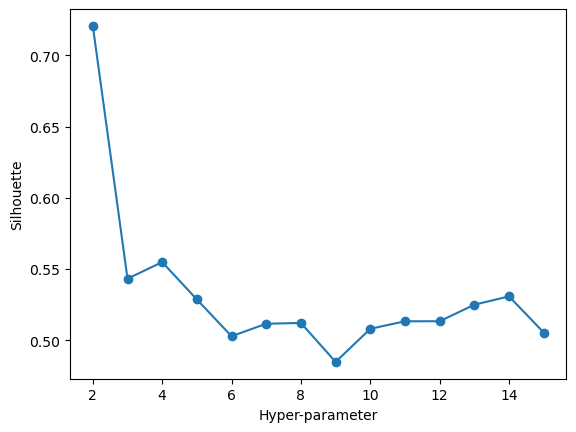

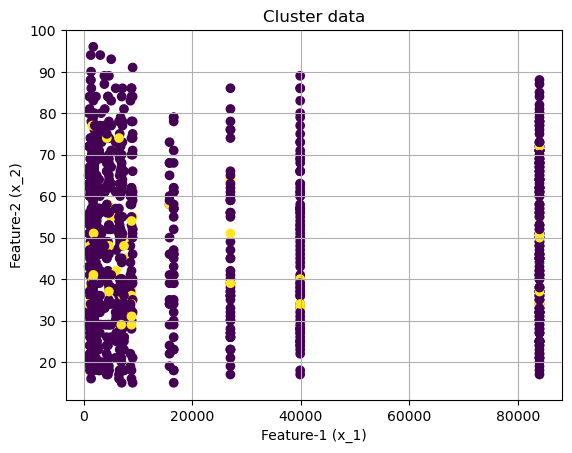

In [39]:
X_short = X.sample(n=1000)
# KMEANS
opt_labels=maximize_silhouette(X_short,algo="kmeans",nmax=15, i_plot=True)
plot(X_short.to_numpy(),opt_labels)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


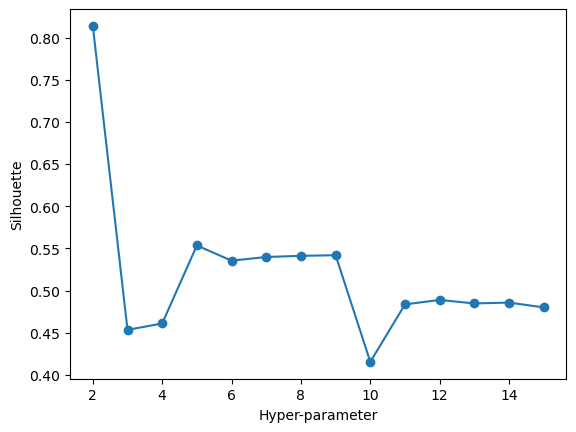

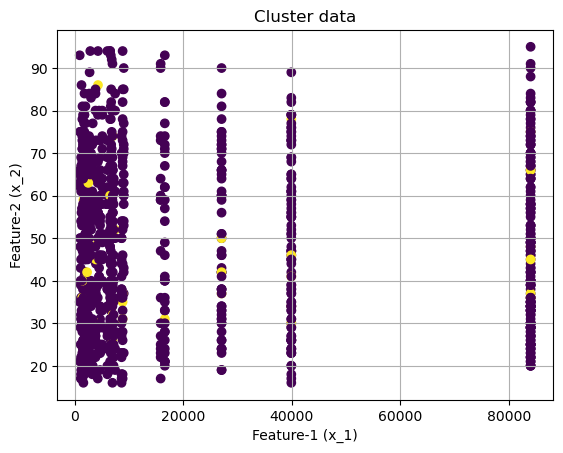

In [35]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X_short,algo="ag",nmax=15, i_plot=True)
plot(X_short.to_numpy(),opt_labels)

In [ ]:
# DBSCAN
opt_labels=maximize_silhouette(X_short,algo="dbscan",nmax=15, i_plot=True)
plot(X_short,opt_labels)

In [ ]:
# BIRCH
opt_labels=maximize_silhouette(X_short,algo="birch",nmax=15, i_plot=True)
plot(X_short,opt_labels)

### Text Data

In [44]:
yelp = pd.read_csv('../data/cleaned_data/total_yelp.csv')

In [49]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm
tqdm.pandas()
import string
from collections import Counter
token_counter = Counter()
from nltk.corpus import stopwords
nltk.download('stopwords')
custom_stoplemmas = [
    'be',
    'ir',
    'll',
    'nt',
    'quot',
    'rd',
    's',
    've'
]

def remove_special_chars(token):
  return token.translate(str.maketrans('', '', string.punctuation))

def remove_digits(token):
  return ''.join([c for c in token if not c.isdigit()])

def clean_review(review_text):
  review_cleaned = review_text.lower()
  review_sents = sent_tokenize(review_cleaned)
  clean_sents = []
  for cur_sent in review_sents:
    sent_tokens = word_tokenize(cur_sent)
    # Remove stopwords
    sent_tokens_cleaned = [t for t in sent_tokens if t not in stopwords.words('english')]
    # Remove digits from each token
    sent_tokens_cleaned = [remove_digits(t) for t in sent_tokens_cleaned]
    # Replace hyphens in hyphenated words with spaces
    sent_tokens_cleaned = [t.replace("-", " ") for t in sent_tokens_cleaned]
    # Remove special characters (punctuation)
    sent_tokens_cleaned = [remove_special_chars(t) for t in sent_tokens_cleaned]
    # Make sure empty tokens are removed
    sent_tokens_cleaned = [t for t in sent_tokens_cleaned if len(t) > 0]
    # Lemmatize
    sent_tokens_cleaned = [lemmatizer.lemmatize(t) for t in sent_tokens_cleaned]
    # And then we remove custom_stoplemmas
    sent_tokens_cleaned = [t for t in sent_tokens_cleaned if t not in custom_stoplemmas]
    # Add to our Counter object
    token_counter.update(sent_tokens_cleaned)
    # Re-join the individual tokens in the sentence into a single string
    clean_sent = ' '.join(sent_tokens_cleaned)
    clean_sents.append(clean_sent)
  review_final = ". ".join(clean_sents)
  return review_final
yelp['Review_clean'] = yelp['Review'].progress_apply(clean_review)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joshsweren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joshsweren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshsweren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 2434/2434 [00:35<00:00, 68.94it/s] 


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = yelp['Review_clean'].values
max_document_freq = 0.4
min_document_count = 6
cv = CountVectorizer(max_df=max_document_freq, min_df=min_document_count)
X_text = cv.fit_transform(corpus)
X_text.shape

(2434, 3044)

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=2, n_init=4, random_state=5000)
kmeans.fit(X_text)
y_pred = kmeans.predict(X_text)
print(len(y_pred[y_pred==0]))
print(len(y_pred[y_pred==1]))

378
2056


In [60]:
centroids = kmeans.cluster_centers_
from sklearn.metrics import pairwise_distances_argmin_min
argmins, mins = pairwise_distances_argmin_min(centroids, X_text)
argmin_0 = argmins[0]
argmin_1 = argmins[1]
yelp['y_pred'] = y_pred
pd.crosstab(yelp['Rating'], yelp['y_pred'])

y_pred,0,1
Rating,,
1,92,879
2,76,266
3,91,349
4,85,364
5,34,198


In [61]:
pd.crosstab(yelp['Rating'], yelp['y_pred'], normalize='all', margins=True)

y_pred,0,1,All
Rating,,,
1,0.037798,0.361134,0.398932
2,0.031224,0.109285,0.140509
3,0.037387,0.143385,0.180772
4,0.034922,0.149548,0.184470
5,0.013969,0.081348,0.095316
All,0.155300,0.844700,1.000000


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


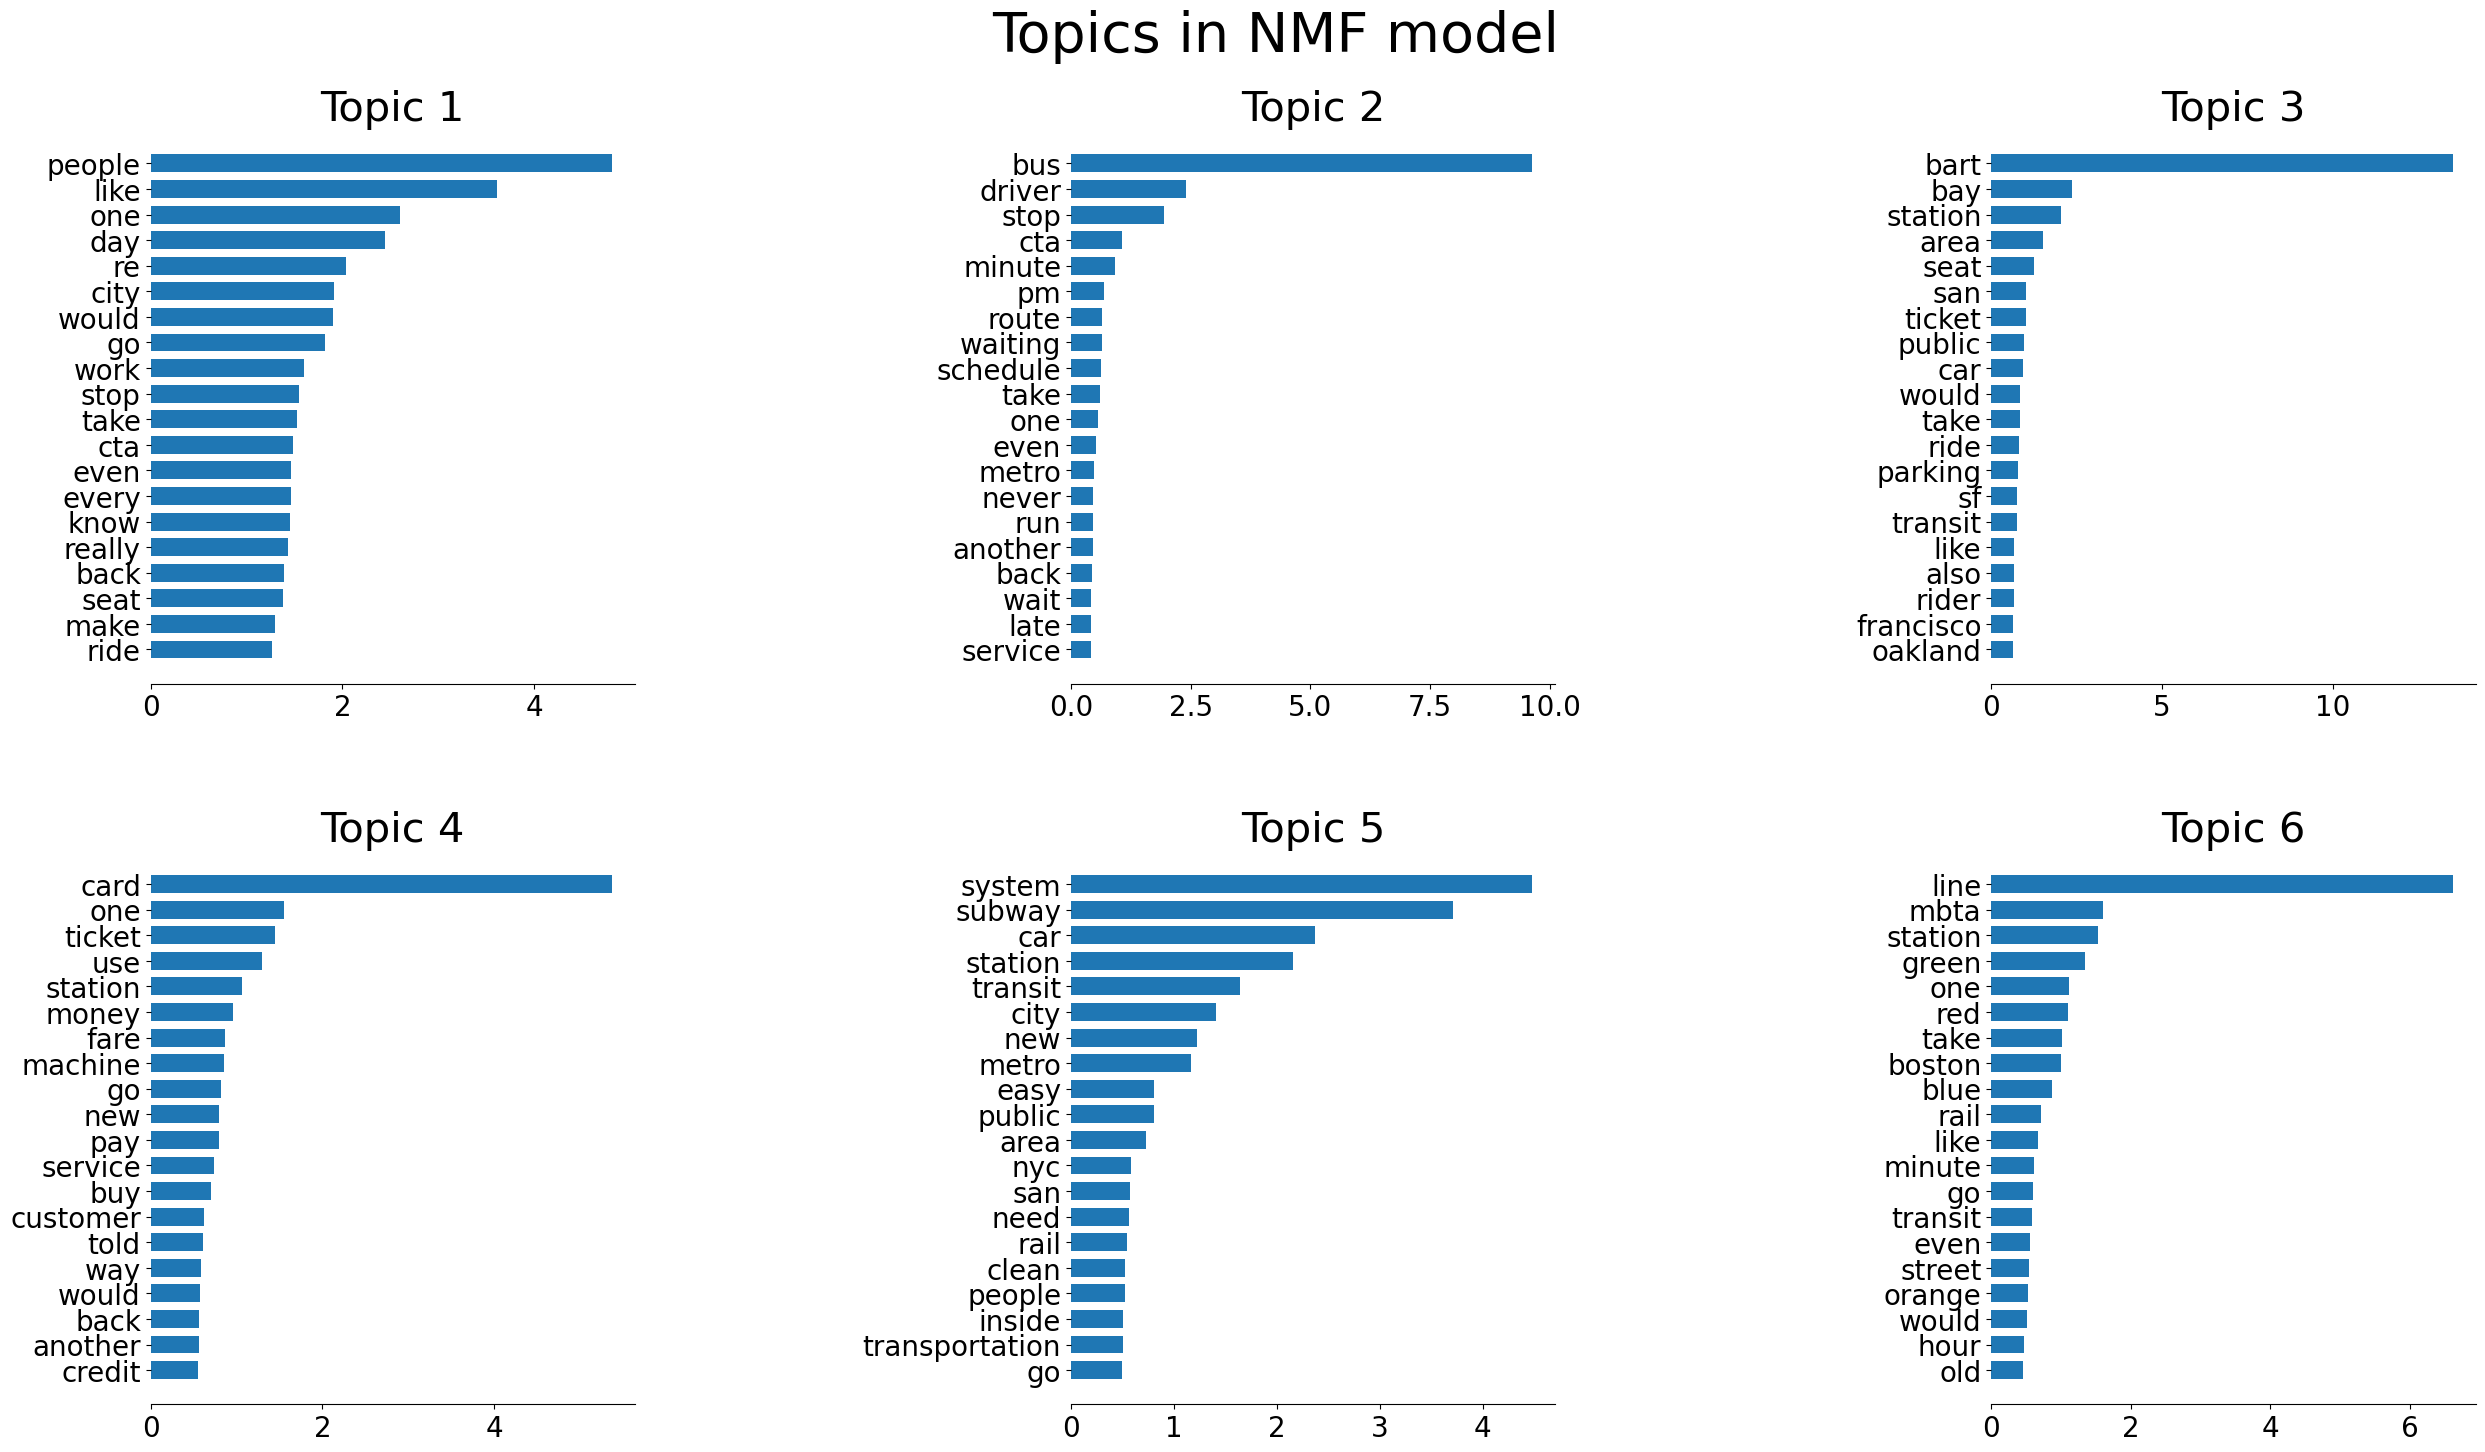

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, NMF
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15)) #, sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
n_top_words = 20
num_topics = 6
nmf = NMF(
    n_components=num_topics,
    random_state=5000,
    beta_loss="frobenius",
)
nmf.fit(X_text)
feature_names = cv.get_feature_names_out()
plot_top_words(nmf, feature_names, n_top_words, "Topics in NMF model")

In [67]:
from sklearn.manifold import TSNE
nmf_ng_components = nmf.components_
W = nmf.transform(X_text)
W_df = pd.DataFrame(W)
W_df['cluster'] = W_df.idxmax(axis=1)
tsne_model = TSNE(
    init='random',
    random_state=5000
)
tsne_embedding = tsne_model.fit_transform(W)
tsne_df = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_df['cluster'] = W_df['cluster']
tsne_df['review'] = yelp['Review']
tsne_df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,x,y,cluster,review
0,1.753154,-34.430798,0,I had to compliment WMATA on the shuttle servi...
1,25.326105,4.811821,5,Since when did metro close the doors to their ...
2,-0.772551,-13.898097,0,So many things wrong with wmata I can't even b...
3,-7.657679,-37.286423,0,"I WFH, and WMATA has been very helpful in my m..."
4,-15.491151,-26.935757,4,I took the metro while visiting DC. I began at...


<Axes: xlabel='x', ylabel='y'>

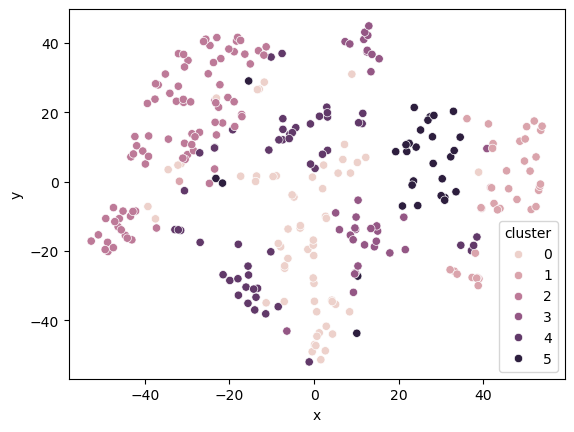

In [68]:
import seaborn as sns
tsne_sample_size = 300
tsne_sample_df = tsne_df.sample(tsne_sample_size, random_state=5000)
sns.scatterplot(tsne_sample_df, x='x', y='y', hue='cluster')

In [69]:
import textwrap
mywrap = lambda x: textwrap.wrap(x, width=60)
tsne_sample_df['review'] = tsne_sample_df['review'].apply(lambda x: x if type(x) == str else '')
tsne_sample_df['review_wrap'] = tsne_sample_df['review'].apply(lambda x: '<br>'.join(mywrap(x)))
import plotly.express as px
review_fig = px.scatter(tsne_sample_df, x='x', y='y', color='cluster',
                        hover_data=['review_wrap'], template='simple_white')
# Remove the colorbar
review_fig.update(layout_coloraxis_showscale=False)
# Make the points larger
review_fig.update_traces(marker=dict(size=12),selector=dict(mode='markers'))
review_fig.show()

## Results

### Record Data

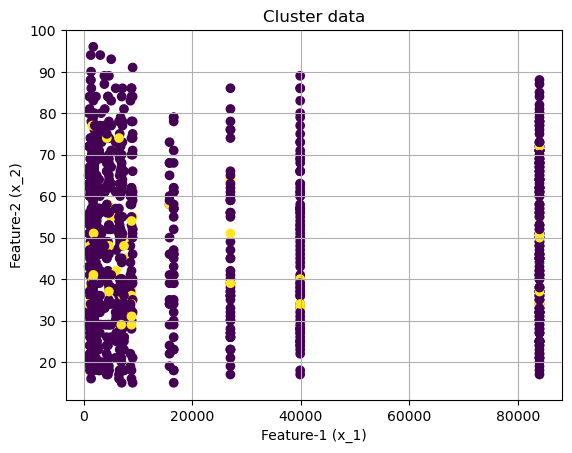

In [40]:
#KMEANS
model = sklearn.cluster.KMeans(n_clusters=2).fit(X_short.to_numpy())
labels=model.predict(X_short.to_numpy())
plot(X_short.to_numpy(),labels)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


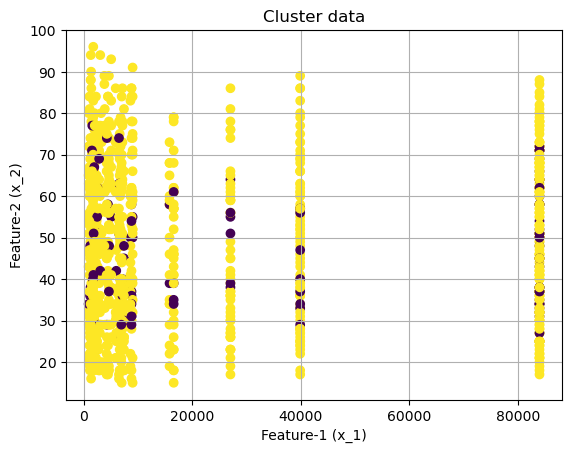

In [42]:
# Birch
model = sklearn.cluster.Birch(n_clusters=2).fit(X_short.to_numpy())
labels=model.predict(X_short.to_numpy())
plot(X_short.to_numpy(),labels)

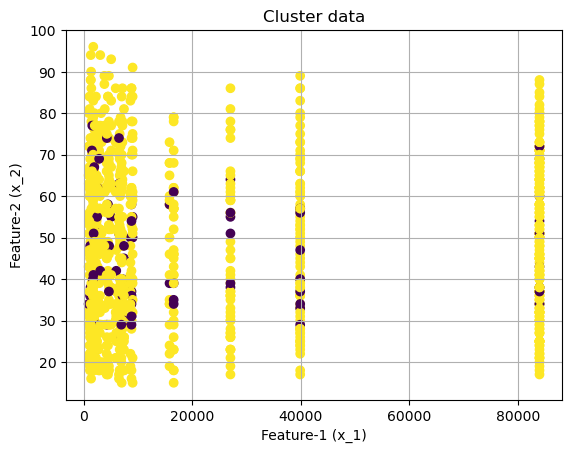

In [43]:
# Agglomerative
model = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(X_short.to_numpy())
labels=model.labels_
plot(X_short.to_numpy(),labels)

### Text Data

## Conclusions